This is a test to see if new scanner head and old one are significatly different even after normalization by using core SO202-37-2.

In [1]:
import numpy as np 
import pandas as pd
import glob
import matplotlib.pyplot as plt

#plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = True

%matplotlib inline

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Read and build spectral datasets

## Inconsistent format
The old head has different format to the previous cores, but quite similar to the format of core LV28-44-3.

In [46]:
# test
spe = 'data/SO202-37-2/Run 3 at  10kV_937-1138cm/SO202-37-2_0937   10.0mm  10s  10kV 1000uA F1.spe'
check_depth = spe.split()[3].split('_')[-1]
if len(check_depth) >= 5:
        start_depth = int(check_depth)
    # 3 and 4 digit means in cm, needs to be multipled to be mm
elif len(check_depth) >= 3:
        start_depth = int(check_depth) * 10

with open(spe, 'r') as f:
    content = []
    lines = f.readlines()
    for line in lines[20:]:
        content = np.hstack((content, line.split()))
len(content)

2048

The parameters looks fine. the length of spe is correct.

In [60]:
file_name = []
spe_all = []
depth_all = []
cps_all = []
head_all = []
s_depth_all = []
  
# only read the 10kV which having better signal to the light elements
spe_dir = glob.glob('data/SO202-37-2/Run 3 at  10kV_937-1138cm/*.spe')

# make sure the order follows the depthes in filename
spe_dir.sort()

for spe in spe_dir:
    check_depth = spe.split()[3].split('_')[-1]

    # there are some inconsistencies in nameing...as usual
    # 5 and 6 digis means in mm
    if len(check_depth) >= 5:
        start_depth = int(check_depth)
    # 3 and 4 digit means in cm, needs to be multipled to be mm
    elif len(check_depth) >= 3:
        start_depth = int(check_depth) * 10

    file_name.append(spe.split('/')[-1])

    with open(spe, 'r') as f:
        content = []
        lines = f.readlines()
        for line in lines[20:]:
            content = np.hstack((content, line.split()))

        section_depth = round(float(spe.split()[4][:-2]))
        spe_all.append(content.astype(int))
        cps_all.append(0)
        head_all.append('old')
        s_depth_all.append(section_depth)
        depth_all.append(section_depth + start_depth)

## Consistent format
The new head has the same spe format as the previous cores.

In [61]:
# only read the 10kV which having better signal to the light elements
spe_dir = glob.glob('data/SO202-37-2_2021rescan_937-1138cm/Run 1 at  10kV_937-1138cm/*.spe')

# make sure the order follows the depthes in filename
spe_dir.sort()

for spe in spe_dir:
    check_depth = spe.split()[3].split('_')[-1]

    # there are some inconsistencies in nameing...as usual
    # 5 and 6 digis means in mm
    if len(check_depth) >= 5:
        start_depth = int(check_depth)
    # 3 and 4 digit means in cm, needs to be multipled to be mm
    elif len(check_depth) >= 3:
        start_depth = int(check_depth) * 10

    file_name.append(spe.split('/')[-1])

    with open(spe, 'r') as f:
        content = []
        lines = f.readlines()
        for line in lines[49:]:
            content = np.hstack((content, line.split()))

        section_depth = int(lines[13][:-3])
        spe_all.append(content.astype(int))
        cps_all.append(int(lines[28]))
        head_all.append('new')
        s_depth_all.append(section_depth)
        depth_all.append(section_depth + start_depth)

## Before normalization

In [81]:
spe_df = pd.DataFrame(spe_all, columns = [str(_) for _ in range(2048)])
spe_df['cps'] = cps_all
spe_df['heads'] = head_all
spe_df['composite_depth_mm'] = depth_all
spe_df['section_depth_mm'] = s_depth_all
spe_df['filename'] = file_name

In [82]:
spe_df

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,cps,heads,composite_depth_mm,section_depth_mm,filename
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,old,9380,10,SO202-37-2_0937 10.0mm 10s 10kV 1000uA F1.spe
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,old,9390,20,SO202-37-2_0937 20.0mm 10s 10kV 1000uA F1.spe
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,old,9400,30,SO202-37-2_0937 30.0mm 10s 10kV 1000uA F1.spe
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,old,9410,40,SO202-37-2_0937 40.0mm 10s 10kV 1000uA F1.spe
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,old,9420,50,SO202-37-2_0937 50.0mm 10s 10kV 1000uA F1.spe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,257201,new,11340,960,SO202-37-2_1038 960.0mm 10s 10kV 150uA No-F...
398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,259019,new,11350,970,SO202-37-2_1038 970.0mm 10s 10kV 150uA No-F...
399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,262329,new,11360,980,SO202-37-2_1038 980.0mm 10s 10kV 150uA No-F...
400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,253033,new,11370,990,SO202-37-2_1038 990.0mm 10s 10kV 150uA No-F...


In [65]:
X = np.array(spe_all)
X = X / X.sum(axis = 1, keepdims = True)

In [83]:
spe_n_df = pd.DataFrame(X, columns = [str(_) for _ in range(2048)])
spe_n_df['cps'] = cps_all
spe_n_df['heads'] = head_all
spe_n_df['composite_depth_mm'] = depth_all
spe_n_df['section_depth_mm'] = s_depth_all
spe_n_df['filename'] = file_name

In [84]:
spe_n_df

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,cps,heads,composite_depth_mm,section_depth_mm,filename
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,old,9380,10,SO202-37-2_0937 10.0mm 10s 10kV 1000uA F1.spe
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,old,9390,20,SO202-37-2_0937 20.0mm 10s 10kV 1000uA F1.spe
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,old,9400,30,SO202-37-2_0937 30.0mm 10s 10kV 1000uA F1.spe
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,old,9410,40,SO202-37-2_0937 40.0mm 10s 10kV 1000uA F1.spe
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,old,9420,50,SO202-37-2_0937 50.0mm 10s 10kV 1000uA F1.spe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,257201,new,11340,960,SO202-37-2_1038 960.0mm 10s 10kV 150uA No-F...
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,259019,new,11350,970,SO202-37-2_1038 970.0mm 10s 10kV 150uA No-F...
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,262329,new,11360,980,SO202-37-2_1038 980.0mm 10s 10kV 150uA No-F...
400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,253033,new,11370,990,SO202-37-2_1038 990.0mm 10s 10kV 150uA No-F...


In [76]:
spe_df.isna().any(axis=None)

False

In [35]:
spe_df[spe_df.heads == 'old']

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,cps,heads,composite_depth_mm,section_depth_mm,filename
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,old,9380,10,SO202-37-2_0937 10.0mm 10s 10kV 1000uA F1.spe
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,old,9390,20,SO202-37-2_0937 20.0mm 10s 10kV 1000uA F1.spe
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,old,9400,30,SO202-37-2_0937 30.0mm 10s 10kV 1000uA F1.spe
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,old,9410,40,SO202-37-2_0937 40.0mm 10s 10kV 1000uA F1.spe
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,old,9420,50,SO202-37-2_0937 50.0mm 10s 10kV 1000uA F1.spe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,old,11340,960,SO202-37-2_1038 960.0mm 10s 10kV 1000uA F1.spe
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,old,11350,970,SO202-37-2_1038 970.0mm 10s 10kV 1000uA F1.spe
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,old,11360,980,SO202-37-2_1038 980.0mm 10s 10kV 1000uA F1.spe
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,old,11370,990,SO202-37-2_1038 990.0mm 10s 10kV 1000uA F1.spe


# Compare two heads

20210628


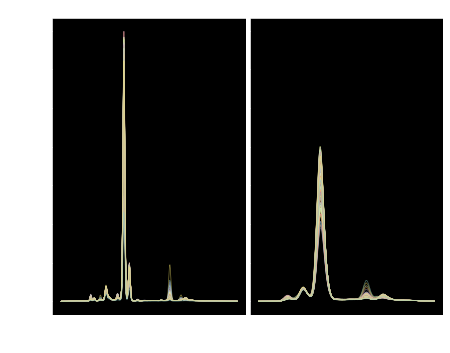

In [85]:
fig, axes = plt.subplots(1, 2, sharex='row', sharey='row', figsize=(7, 5))
for ax, head in zip(axes, ['old', 'new']):
    for _, row in spe_df[spe_df.heads == head].iterrows():
        ax.plot(range(520), row[:520], lw=.7, alpha=.5)
        ax.set_xlabel('{} head'.format(head))
plt.subplots_adjust(wspace=.02, top=.95)
fig.suptitle('Core SO202-37-2')
#fig.savefig('results/test_heads_spe_{}.png'.format(date))
print(date)

20210628


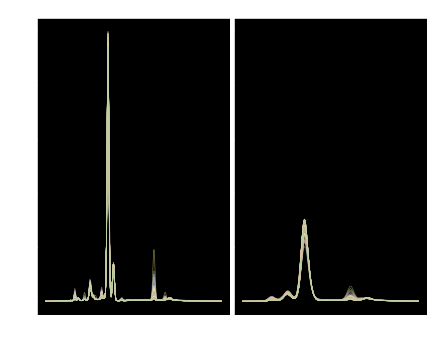

In [80]:
fig, axes = plt.subplots(1, 2, sharex='row', sharey='row', figsize=(7, 5))
for ax, head in zip(axes, ['old', 'new']):
    for _, row in spe_n_df[spe_n_df.heads == head].iterrows():
        ax.plot(range(520), row[:520], lw=.7, alpha=.5)
        ax.set_xlabel('{} head'.format(head))
plt.subplots_adjust(wspace=.02, top=.95)
fig.suptitle('Core SO202-37-2')
fig.savefig('results/test_heads_spe_{}.png'.format(date))
print(date)

Unfortunately, even after normalization, the spectral behavior of the same section from core SO202-37-2 is different in two heads. It points out mixing data produced by different scaner heads should be treated with caution.

# Check the whole dataset
Okay, let's check the scanner information of the whole dataset. date (\\$DATE_MEA), volt (\\$ACC_VOLT), current (\\$TUBE_CUR), measring time (\\$MEAS_TIM), data amout

In [2]:
dirs = glob.glob('data/SO*')
# remove this rescan section
dirs.remove('data/SO202-37-2_2021rescan_937-1138cm')
dirs = np.hstack((dirs, glob.glob('data/LV*')))
dirs = np.hstack((dirs, glob.glob('data/PS*')))
dirs

array(['data/SO264-64-1', 'data/SO264-56-2', 'data/SO264-55-1',
       'data/SO264-34-2', 'data/SO264-15-2', 'data/SO264-46-5',
       'data/SO264-47-2', 'data/SO264-66-2', 'data/SO264-45-2',
       'data/SO264-26-2', 'data/SO264-14-1', 'data/SO264-76-1',
       'data/SO264-54-2', 'data/SO264-16-2', 'data/SO202-37-2',
       'data/SO264-44-2', 'data/SO264-24-3', 'data/SO264-60-12',
       'data/SO264-28-2', 'data/SO264-09-2', 'data/SO264-51-2',
       'data/SO264-32-2', 'data/SO264-13-2', 'data/SO264-22-2',
       'data/SO264-41-2', 'data/SO264-19-2', 'data/SO178-12-3',
       'data/SO264-62-2', 'data/SO264-44-3', 'data/SO264-49-2',
       'data/SO264-53-2', 'data/SO264-52-2', 'data/SO264-70-1',
       'data/LV28-44-3', 'data/LV29-114-3', 'data/PS75-056-1',
       'data/PS75-054-1'], dtype='<U16')

In [3]:
# test
cores = []
spe_amount = []
dates = []
times = []
volts = []
currs = []

for folder in dirs:
    spe_dirs = glob.glob('{}/*10kV/*.spe'.format(folder))
    spe_amount.append(len(spe_dirs))
    cores.append(folder[5:])
    # select only the first spe file to read informations
    with open(spe_dirs[0], 'r') as f:
        lines = f.readlines()
    for i, line in enumerate(lines):
        if line == '$ACC_VOLT:\n':
            volts.append(float(lines[i+1].split()[0]))
        elif line == '$TUBE_CUR:\n':
            currs.append(float(lines[i+1].split()[0]))
        elif line == '$DATE_MEA:\n':
            dates.append(datetime.datetime.strptime(lines[i+1].split()[0], '%m-%d-%Y'))
        elif line == '$MEAS_TIM:\n':
            times.append(lines[i+1].split())


In [4]:
print(len(spe_amount), len(dates), len(times), len(volts), len(currs))

37 37 37 37 37


In [4]:
info_df = pd.DataFrame({
    'core': cores,
    'date': dates,
    'time': times,
    'volt_kV': volts,
    'current_A': currs,
    'data_amount': spe_amount
})
info_df

,core,date,time,volt_kV,current_A,data_amount
0,SO264-64-1,2018-12-17,"[10, 17]",10.0,0.15,1844
1,SO264-56-2,2018-11-07,"[10, 18]",10.0,0.15,1261
2,SO264-55-1,2018-11-11,"[10, 19]",10.0,0.15,1382
3,SO264-34-2,2020-05-22,"[10, 46]",10.0,0.15,183
4,SO264-15-2,2019-04-10,"[10, 29]",10.0,0.15,1442
5,SO264-46-5,2020-06-12,"[10, 20]",10.0,0.15,867
6,SO264-47-2,2019-01-15,"[10, 21]",10.0,0.15,680
7,SO264-66-2,2019-03-14,"[10, 19]",10.0,0.15,1481
8,SO264-45-2,2018-11-16,"[10, 21]",10.0,0.15,805
9,SO264-26-2,2018-11-22,"[10, 27]",10.0,0.15,1610


In [5]:
info_df.to_csv('results/scanning_info_{}.csv'.format(date))
print(date)

20210628
